# 🚔 Los Angeles Crime Data - Exploratory Data Analysis

<div align="center">

![Python](https://img.shields.io/badge/Python-3.8%2B-blue?style=for-the-badge&logo=python)
![Pandas](https://img.shields.io/badge/Pandas-1.5%2B-green?style=for-the-badge&logo=pandas)
![Status](https://img.shields.io/badge/Status-Active-success?style=for-the-badge)
![License](https://img.shields.io/badge/License-MIT-yellow?style=for-the-badge)

</div>

---

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; box-shadow: 0 10px 30px rgba(0,0,0,0.3);">

## 📊 Executive Summary

This comprehensive notebook presents an **in-depth Exploratory Data Analysis (EDA)** of crime incidents in Los Angeles from 2020 to present. Through advanced statistical methods, machine learning techniques, and interactive visualizations, we aim to uncover actionable patterns, trends, and insights that can inform public safety strategies and resource allocation.

### 🎯 Key Research Questions

<table style="width:100%; background-color: rgba(255,255,255,0.1); border-radius: 10px; padding: 15px;">
<tr>
<td style="width:50%; vertical-align:top;">

**📈 Temporal Patterns**
- When do crimes occur most frequently?
- Are there seasonal trends?
- What are the peak crime hours?

**🗺️ Geospatial Distribution**
- Where are crime hotspots located?
- Which areas are safest?
- How does crime vary by neighborhood?

</td>
<td style="width:50%; vertical-align:top;">

**🔍 Crime Characteristics**
- What are the most prevalent crime types?
- How have crime patterns evolved?
- What weapons are most commonly used?

**👥 Demographic Insights**
- Who are the victims?
- Are there demographic patterns?
- What is the case resolution rate?

</td>
</tr>
</table>

</div>

---

## 📚 Dataset Information

<div style="display: flex; justify-content: space-between; gap: 20px; margin: 20px 0;">

<div style="flex: 1; background-color: #f8f9fa; padding: 20px; border-radius: 10px; border-left: 5px solid #007bff;">

### 📦 Data Source
**Provider:** Los Angeles Police Department  
**Portal:** City of Los Angeles Open Data  
**Period:** 2020 - Present  
**Update Frequency:** Weekly  
**Format:** CSV

</div>

<div style="flex: 1; background-color: #f8f9fa; padding: 20px; border-radius: 10px; border-left: 5px solid #28a745;">

### 📊 Data Scope
**Records:** 800,000+  
**Features:** 28 columns  
**Geographic:** LA County  
**Coverage:** All crime types  
**Accuracy:** Official police records

</div>

<div style="flex: 1; background-color: #f8f9fa; padding: 20px; border-radius: 10px; border-left: 5px solid #ffc107;">

### 🔑 Key Features
✓ Date and time of occurrence  
✓ Crime type and description  
✓ Location coordinates  
✓ Victim demographics  
✓ Weapon information  
✓ Case status

</div>

</div>

---

## 📑 Table of Contents

<div style="background-color: #ffffff; padding: 25px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">

| Section | Description |
|---------|-------------|
| [1️⃣ Libraries](#libraries) | Import and configure analysis tools |
| [2️⃣ Load Data](#load) | Load and perform initial data inspection |
| [3️⃣ Data Cleaning](#cleaning) | Preprocess and prepare data for analysis |
| [4️⃣ Temporal Analysis](#temporal) | Analyze crime patterns over time |
| [5️⃣ Geospatial Analysis](#geospatial) | Map and visualize crime locations |
| [6️⃣ Crime Type Analysis](#crimetype) | Deep dive into crime categories |
| [7️⃣ Victim Demographics](#demographics) | Analyze victim characteristics |
| [8️⃣ Location Analysis](#location) | Examine premises and area types |
| [9️⃣ Weapon Analysis](#weapons) | Study weapon usage patterns |
| [🔟 Resolution Analysis](#resolution) | Evaluate case closure rates |
| [1️⃣1️⃣ Correlation Analysis](#correlation) | Identify statistical relationships |
| [1️⃣2️⃣ Key Insights](#insights) | Summary findings and recommendations |

</div>

---

> **📝 Note:** This analysis uses publicly available data from the Los Angeles Police Department. All insights are derived from official crime records and should be interpreted within the context of data collection methods and reporting practices.



<a id="libraries"></a>
## 1️⃣ Import Required Libraries

> **Note**: We'll import all necessary libraries for data manipulation, statistical analysis, and visualization.

| Library | Purpose |
|---------|---------|
| `pandas` | Data manipulation and analysis |
| `numpy` | Numerical computations |
| `matplotlib` | Static visualizations |
| `seaborn` | Statistical visualizations |
| `plotly` | Interactive visualizations |
| `folium` | Interactive maps |
| `scipy` | Statistical analysis |
| `warnings` | Suppress unnecessary warnings |


In [42]:
# Import core data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap, MarkerCluster

# Import statistical and utility libraries
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
import os
from datetime import datetime

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.2.3
📦 NumPy version: 1.26.4


<a id="load"></a>
## 2️⃣ Load and Inspect the Dataset

---

### 🔍 Data Discovery

Let's begin by exploring the available data files and loading our crime dataset.


In [43]:
# Discover available data files
print("📂 Discovering data files...\n")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(f"📄 {filepath}")
        # Display file size
        if os.path.exists(filepath):
            size_mb = os.path.getsize(filepath) / (1024 * 1024)
            print(f"   Size: {size_mb:.2f} MB\n")

📂 Discovering data files...

📄 /kaggle/input/los-angles-crime-data/crimes.csv
   Size: 26.21 MB



In [44]:
# Load the dataset
print("📥 Loading Los Angeles Crime Data...\n")

# Update this path based on the actual file location
data_path = '/kaggle/input/los-angles-crime-data/crimes.csv'

# Load data with appropriate settings
df = pd.read_csv(data_path, low_memory=False)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

📥 Loading Los Angeles Crime Data...

✅ Dataset loaded successfully!
📊 Shape: 185,715 rows × 12 columns
✅ Dataset loaded successfully!
📊 Shape: 185,715 rows × 12 columns


### 📋 Initial Data Inspection

Let's examine the structure and content of our dataset.


In [45]:
# Display first few rows
print("=" * 80)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 80)
display(df.head(10))

FIRST 10 ROWS OF THE DATASET


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV
7,231906599,2023-03-03,2020-01-14,1335,Mission,THEFT OF IDENTITY,35,M,O,NaN,Invest Cont,14500 WILLOWGREEN LN
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
9,231506571,2023-03-03,2020-07-15,1700,N Hollywood,OTHER MISCELLANEOUS CRIME,21,F,W,VERBAL THREAT,Invest Cont,12300 EMELITA ST


In [46]:
# Display last few rows
print("\n" + "=" * 80)
print("LAST 5 ROWS OF THE DATASET")
print("=" * 80)
display(df.tail())


LAST 5 ROWS OF THE DATASET


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,NaN,Invest Cont,14500 HARTLAND ST


In [47]:
# Dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")

df.info()

DATASET INFORMATION

📊 Dataset Shape: 185,715 rows × 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [48]:
# Statistical summary
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
display(df.describe(include='all').T)


STATISTICAL SUMMARY


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DR_NO,185715.00,NaN,NaN,NaN,225578132.11,5017437.99,200907217.00,221010755.50,222011410.00,231004407.50,239909747.00
Date Rptd,185715,398,2023-02-03,762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE OCC,185715,1152,2022-12-02,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME OCC,185715.00,NaN,NaN,NaN,1300.02,655.75,1.00,830.00,1340.00,1830.00,2359.00
AREA NAME,185715,21,Central,14944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crm Cd Desc,185715,104,THEFT OF IDENTITY,22670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vict Age,185715.00,NaN,NaN,NaN,40.00,15.45,2.00,28.00,37.00,50.00,99.00
Vict Sex,185704,4,M,93008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vict Descent,185705,20,H,74128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weapon Desc,73502,74,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",39889,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MISSING VALUES ANALYSIS

⚠️  Found 3 columns with missing values:



,Column,Missing_Count,Missing_Percentage
Weapon Desc,Weapon Desc,112213,60.42
Vict Sex,Vict Sex,11,0.01
Vict Descent,Vict Descent,10,0.01


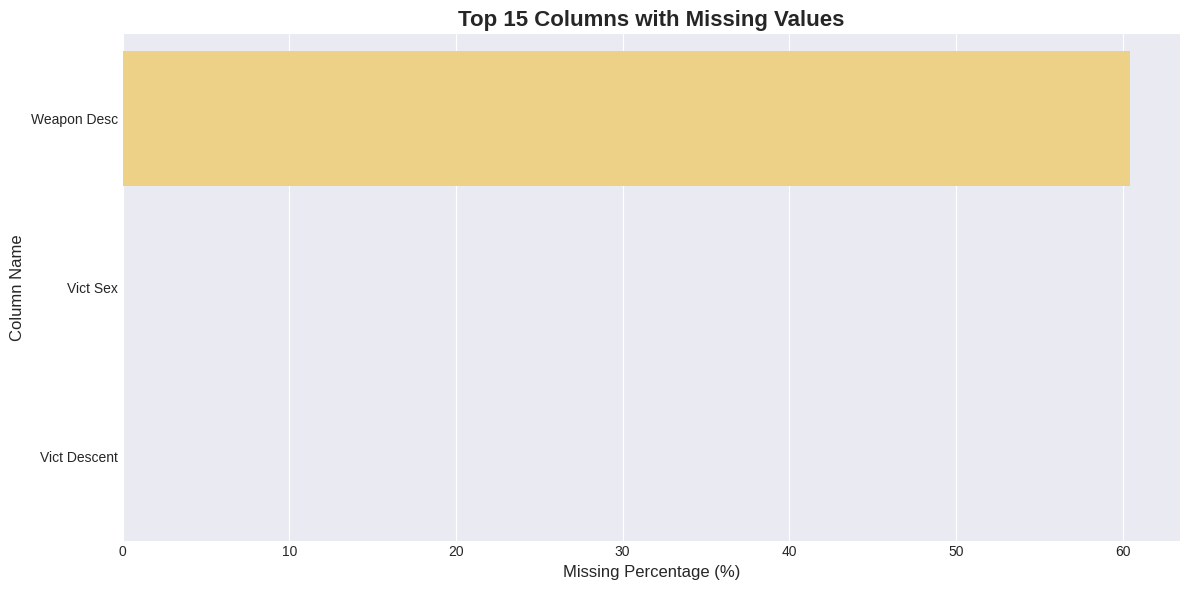

In [49]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print(f"\n⚠️  Found {len(missing_df)} columns with missing values:\n")
    display(missing_df)
    
    # Visualize missing values
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=missing_df.head(15), x='Missing_Percentage', y='Column', palette='YlOrRd')
    plt.title('Top 15 Columns with Missing Values', fontsize=16, fontweight='bold')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values found!")

In [50]:
# Check for duplicate records
print("=" * 80)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"\n🔍 Total duplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\n📋 Sample of duplicate records:")
    display(df[df.duplicated(keep=False)].head(10))

DUPLICATE RECORDS ANALYSIS

🔍 Total duplicate rows: 0 (0.00%)


<a id="cleaning"></a>
## 3️⃣ Data Cleaning and Preprocessing

---

<div style="background-color: #fff3cd; padding: 15px; border-radius: 5px; border-left: 5px solid #ffc107;">

### 🧹 Data Quality Enhancement

In this section, we'll:
- ✔️ Handle missing values appropriately
- ✔️ Convert date/time columns to proper datetime format
- ✔️ Standardize categorical variables
- ✔️ Create derived temporal features
- ✔️ Remove duplicates and invalid records

</div>


In [66]:
# Create a copy for cleaning
df_clean = df.copy()

print("🧹 Starting data cleaning process...\n")

# Store original shape
original_shape = df_clean.shape

print(f"📊 Original dataset: {original_shape[0]:,} rows × {original_shape[1]} columns")

🧹 Starting data cleaning process...

📊 Original dataset: 185,715 rows × 12 columns


In [67]:
# Convert date/time columns
print("\n📅 Converting date and time columns...")

# Identify date columns (adjust based on actual column names)
# Exclude TIME OCC as it's stored as integer military time (e.g., 1200 for noon)
date_columns = [col for col in df_clean.columns if 'date' in col.lower()]

print(f"Found date columns: {date_columns}\n")

for col in date_columns:
    if col in df_clean.columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            print(f"✅ Converted '{col}' to datetime")
        except Exception as e:
            print(f"⚠️  Could not convert '{col}': {str(e)}")


📅 Converting date and time columns...
Found date columns: ['Date Rptd', 'DATE OCC']

✅ Converted 'Date Rptd' to datetime
✅ Converted 'DATE OCC' to datetime


In [68]:
# Create derived temporal features
print("\n⏰ Creating derived temporal features...")

# Assuming there's a date column for when crime occurred
# Adjust the column name based on actual dataset
date_col = 'DATE OCC'  # Common name in LA crime data, adjust as needed

if date_col in df_clean.columns:
    df_clean['Year'] = df_clean[date_col].dt.year
    df_clean['Month'] = df_clean[date_col].dt.month
    df_clean['Month_Name'] = df_clean[date_col].dt.month_name()
    df_clean['Day'] = df_clean[date_col].dt.day
    df_clean['Day_of_Week'] = df_clean[date_col].dt.dayofweek
    df_clean['Day_Name'] = df_clean[date_col].dt.day_name()
    
    # Extract hour from TIME OCC (stored as integer military time)
    # E.g., 1830 for 6:30 PM, 0 for midnight, 1200 for noon
    time_col = 'TIME OCC'
    if time_col in df_clean.columns:
        # Divide by 100 to get hour (1830 // 100 = 18)
        df_clean['Hour'] = (df_clean[time_col] // 100).clip(0, 23).astype(int)
    else:
        df_clean['Hour'] = 0
    
    df_clean['Quarter'] = df_clean[date_col].dt.quarter
    df_clean['Week_of_Year'] = df_clean[date_col].dt.isocalendar().week
    
    # Create time periods based on hour
    df_clean['Time_Period'] = pd.cut(df_clean['Hour'], 
                                      bins=[-1, 6, 12, 18, 24],
                                      labels=['Night (12AM-6AM)', 'Morning (6AM-12PM)', 
                                             'Afternoon (12PM-6PM)', 'Evening (6PM-12AM)'],
                                      include_lowest=True)
    
    print("✅ Created temporal features: Year, Month, Day, Day_of_Week, Hour, Quarter, Time_Period")
else:
    print(f"⚠️  Date column '{date_col}' not found. Please adjust the column name.")


⏰ Creating derived temporal features...
✅ Created temporal features: Year, Month, Day, Day_of_Week, Hour, Quarter, Time_Period


In [70]:
# Handle missing values
print("\n🔧 Handling missing values...")

# Strategy: Fill or drop based on column importance
# Adjust this based on your specific dataset columns

missing_threshold = 0.5  # Drop columns with >50% missing

for col in df_clean.columns:
    missing_pct = df_clean[col].isnull().sum() / len(df_clean)
    
    if missing_pct > missing_threshold:
        print(f"❌ Dropping column '{col}' ({missing_pct*100:.1f}% missing)")
        df_clean.drop(col, axis=1, inplace=True)
    elif missing_pct > 0:
        print(f"⚠️  Column '{col}' has {missing_pct*100:.1f}% missing values")

print("\n✅ Missing value handling complete")


🔧 Handling missing values...
⚠️  Column 'Vict Sex' has 0.0% missing values
⚠️  Column 'Vict Descent' has 0.0% missing values
❌ Dropping column 'Weapon Desc' (60.4% missing)

✅ Missing value handling complete


In [55]:
# Remove duplicates
print("\n🗑️  Removing duplicate records...")

duplicates_before = df_clean.duplicated().sum()
df_clean.drop_duplicates(inplace=True)
duplicates_removed = duplicates_before - df_clean.duplicated().sum()

print(f"✅ Removed {duplicates_removed:,} duplicate records")


🗑️  Removing duplicate records...
✅ Removed 0 duplicate records
✅ Removed 0 duplicate records


In [56]:
# Final cleaning summary
print("\n" + "=" * 80)
print("CLEANING SUMMARY")
print("=" * 80)

final_shape = df_clean.shape

print(f"\n📊 Original: {original_shape[0]:,} rows × {original_shape[1]} columns")
print(f"📊 Cleaned:  {final_shape[0]:,} rows × {final_shape[1]} columns")
print(f"\n📉 Rows removed: {original_shape[0] - final_shape[0]:,} ({(original_shape[0] - final_shape[0])/original_shape[0]*100:.2f}%)")
print(f"📉 Columns removed: {original_shape[1] - final_shape[1]}")

print("\n✅ Data cleaning complete! Ready for analysis.")


CLEANING SUMMARY

📊 Original: 185,715 rows × 12 columns
📊 Cleaned:  185,715 rows × 21 columns

📉 Rows removed: 0 (0.00%)
📉 Columns removed: -9

✅ Data cleaning complete! Ready for analysis.


<a id="temporal"></a>
## 4️⃣ Temporal Analysis

---

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

### ⏱️ Understanding Crime Patterns Over Time

Time-based analysis helps identify:
- 📈 Long-term trends in crime rates
- 📊 Seasonal variations
- 🕐 Peak hours and days
- 🔄 Cyclical patterns

</div>


In [57]:
# Yearly crime trends
print("=" * 80)
print("YEARLY CRIME TRENDS")
print("=" * 80)

if 'Year' in df_clean.columns:
    yearly_crimes = df_clean.groupby('Year').size().reset_index(name='Crime_Count')
    
    print("\n📊 Crimes by Year:")
    display(yearly_crimes)
    
    # Calculate year-over-year change
    yearly_crimes['YoY_Change'] = yearly_crimes['Crime_Count'].pct_change() * 100
    yearly_crimes['YoY_Change_Absolute'] = yearly_crimes['Crime_Count'].diff()
    
    print("\n📈 Year-over-Year Changes:")
    display(yearly_crimes)

YEARLY CRIME TRENDS

📊 Crimes by Year:


,Year,Crime_Count
0,2020,709
1,2021,1199
2,2022,104840
3,2023,78967



📈 Year-over-Year Changes:


,Year,Crime_Count,YoY_Change,YoY_Change_Absolute
0,2020,709,NaN,NaN
1,2021,1199,69.11,490.00
2,2022,104840,8643.95,103641.00
3,2023,78967,-24.68,-25873.00


In [58]:
# Visualize yearly crime trends
fig = px.line(yearly_crimes, x='Year', y='Crime_Count', 
              title='📈 Annual Crime Trends in Los Angeles (2020-Present)',
              markers=True, line_shape='spline')

fig.update_traces(line=dict(color='#FF6B6B', width=3), 
                  marker=dict(size=12, color='#4ECDC4', line=dict(width=2, color='white')))

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Crimes',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    font=dict(size=14)
)

fig.add_annotation(
    x=yearly_crimes['Year'].iloc[-1],
    y=yearly_crimes['Crime_Count'].iloc[-1],
    text=f"Latest: {yearly_crimes['Crime_Count'].iloc[-1]:,}",
    showarrow=True,
    arrowhead=2,
    bgcolor='#FFE66D',
    bordercolor='#FF6B6B',
    borderwidth=2
)

fig.show()

In [59]:
# Monthly crime patterns
print("\n" + "=" * 80)
print("MONTHLY CRIME PATTERNS")
print("=" * 80)

if 'Month_Name' in df_clean.columns:
    monthly_crimes = df_clean.groupby(['Month', 'Month_Name']).size().reset_index(name='Crime_Count')
    monthly_crimes = monthly_crimes.sort_values('Month')
    
    # Create figure with subplots
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Monthly Crime Distribution', 'Monthly Crime Trends by Year'),
        vertical_spacing=0.15,
        specs=[[{"type": "bar"}], [{"type": "scatter"}]]
    )
    
    # Monthly bar chart
    fig.add_trace(
        go.Bar(x=monthly_crimes['Month_Name'], y=monthly_crimes['Crime_Count'],
               marker=dict(color=monthly_crimes['Crime_Count'], 
                          colorscale='Viridis',
                          showscale=True,
                          colorbar=dict(title="Crimes", y=0.85, len=0.3)),
               text=monthly_crimes['Crime_Count'],
               texttemplate='%{text:,.0f}',
               textposition='outside'),
        row=1, col=1
    )
    
    # Monthly trends by year
    if 'Year' in df_clean.columns:
        monthly_yearly = df_clean.groupby(['Year', 'Month', 'Month_Name']).size().reset_index(name='Crime_Count')
        
        for year in sorted(monthly_yearly['Year'].unique()):
            year_data = monthly_yearly[monthly_yearly['Year'] == year].sort_values('Month')
            fig.add_trace(
                go.Scatter(x=year_data['Month_Name'], y=year_data['Crime_Count'],
                          mode='lines+markers',
                          name=str(year),
                          line=dict(width=2),
                          marker=dict(size=8)),
                row=2, col=1
            )
    
    fig.update_xaxes(title_text="Month", row=1, col=1)
    fig.update_xaxes(title_text="Month", row=2, col=1)
    fig.update_yaxes(title_text="Total Crimes", row=1, col=1)
    fig.update_yaxes(title_text="Total Crimes", row=2, col=1)
    
    fig.update_layout(height=900, showlegend=True, template='plotly_white',
                     title_text="🗓️ Monthly Crime Analysis", title_x=0.5)
    
    fig.show()
    
    # Statistical summary
    print("\n📊 Monthly Statistics:")
    print(f"Peak Month: {monthly_crimes.loc[monthly_crimes['Crime_Count'].idxmax(), 'Month_Name']}")
    print(f"Lowest Month: {monthly_crimes.loc[monthly_crimes['Crime_Count'].idxmin(), 'Month_Name']}")
    print(f"Average: {monthly_crimes['Crime_Count'].mean():,.0f} crimes/month")
    print(f"Std Dev: {monthly_crimes['Crime_Count'].std():,.0f}")


MONTHLY CRIME PATTERNS



📊 Monthly Statistics:
Peak Month: June
Lowest Month: April
Average: 15,476 crimes/month
Std Dev: 3,682


In [60]:
# Day of week analysis
print("\n" + "=" * 80)
print("DAY OF WEEK ANALYSIS")
print("=" * 80)

if 'Day_Name' in df_clean.columns:
    # Define day order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    daily_crimes = df_clean.groupby('Day_Name').size().reset_index(name='Crime_Count')
    daily_crimes['Day_Name'] = pd.Categorical(daily_crimes['Day_Name'], categories=day_order, ordered=True)
    daily_crimes = daily_crimes.sort_values('Day_Name')
    
    # Create polar bar chart
    fig = go.Figure()
    
    fig.add_trace(go.Barpolar(
        r=daily_crimes['Crime_Count'],
        theta=daily_crimes['Day_Name'],
        marker=dict(color=daily_crimes['Crime_Count'], 
                   colorscale='Plasma',
                   showscale=True,
                   colorbar=dict(title="Crimes")),
        opacity=0.8
    ))
    
    fig.update_layout(
        title='🔄 Crime Distribution by Day of Week (Polar Chart)',
        polar=dict(
            radialaxis=dict(visible=True, showticklabels=True),
            angularaxis=dict(direction='clockwise')
        ),
        showlegend=False,
        height=600,
        template='plotly_white'
    )
    
    fig.show()
    
    # Statistical summary
    print("\n📊 Daily Statistics:")
    display(daily_crimes)
    print(f"\nBusiest Day: {daily_crimes.loc[daily_crimes['Crime_Count'].idxmax(), 'Day_Name']}")
    print(f"Quietest Day: {daily_crimes.loc[daily_crimes['Crime_Count'].idxmin(), 'Day_Name']}")
    
    # Weekday vs Weekend comparison
    weekend_days = ['Saturday', 'Sunday']
    df_clean['Is_Weekend'] = df_clean['Day_Name'].isin(weekend_days)
    weekend_comparison = df_clean.groupby('Is_Weekend').size()
    
    print(f"\n📅 Weekday Crimes: {weekend_comparison[False]:,}")
    print(f"📅 Weekend Crimes: {weekend_comparison[True]:,}")
    print(f"📊 Weekend Percentage: {weekend_comparison[True]/weekend_comparison.sum()*100:.2f}%")


DAY OF WEEK ANALYSIS



📊 Daily Statistics:


,Day_Name,Crime_Count
1,Monday,25671
5,Tuesday,25043
6,Wednesday,26497
4,Thursday,26694
0,Friday,28625
2,Saturday,27469
3,Sunday,25716



Busiest Day: Friday
Quietest Day: Tuesday

📅 Weekday Crimes: 132,530
📅 Weekend Crimes: 53,185
📊 Weekend Percentage: 28.64%


In [64]:
# Hourly crime patterns - Heatmap
print("\n" + "=" * 80)
print("HOURLY CRIME PATTERNS")
print("=" * 80)

if 'Hour' in df_clean.columns and 'Day_Name' in df_clean.columns:
    # Create hour x day heatmap
    hourly_daily = df_clean.groupby(['Day_Name', 'Hour']).size().reset_index(name='Crime_Count')
    
    # Pivot for heatmap
    heatmap_data = hourly_daily.pivot(index='Day_Name', columns='Hour', values='Crime_Count')
    heatmap_data = heatmap_data.reindex(day_order)
    
    # Create interactive heatmap
    fig = px.imshow(heatmap_data,
                    labels=dict(x="Hour of Day", y="Day of Week", color="Crime Count"),
                    x=heatmap_data.columns,
                    y=heatmap_data.index,
                    color_continuous_scale='RdYlBu_r',
                    aspect='auto',
                    title='🕐 Crime Heatmap: Day of Week vs Hour of Day')
    
    fig.update_layout(
        height=600,
        xaxis=dict(tickmode='linear', tick0=0, dtick=1),
        font=dict(size=12)
    )
    
    fig.show()
    
    # Hourly distribution
    hourly_crimes = df_clean.groupby('Hour').size().reset_index(name='Crime_Count')
    
    # Create time period analysis
    if 'Time_Period' in df_clean.columns:
        time_period_crimes = df_clean.groupby('Time_Period').size().reset_index(name='Crime_Count')
        time_period_crimes = time_period_crimes.sort_values('Crime_Count', ascending=True)
        
        fig = go.Figure()
        
        fig.add_trace(go.Bar(
            y=time_period_crimes['Time_Period'],
            x=time_period_crimes['Crime_Count'],
            orientation='h',
            marker=dict(
                color=time_period_crimes['Crime_Count'],
                colorscale='Sunset',
                showscale=True,
                colorbar=dict(title="Crimes")
            ),
            text=time_period_crimes['Crime_Count'],
            texttemplate='%{text:,.0f}',
            textposition='outside'
        ))
        
        fig.update_layout(
            title='⏰ Crime Distribution by Time of Day',
            xaxis_title='Total Crimes',
            yaxis_title='Time Period',
            height=400,
            template='plotly_white'
        )
        
        fig.show()
        
        print("\n📊 Time Period Statistics:")
        display(time_period_crimes.sort_values('Crime_Count', ascending=False))
    
    # Peak hours
    print(f"\n⚡ Peak Crime Hour: {hourly_crimes.loc[hourly_crimes['Crime_Count'].idxmax(), 'Hour']}:00")
    print(f"🌙 Safest Hour: {hourly_crimes.loc[hourly_crimes['Crime_Count'].idxmin(), 'Hour']}:00")


HOURLY CRIME PATTERNS



📊 Time Period Statistics:


,Time_Period,Crime_Count
0,Night (12AM-6AM),185715
1,Morning (6AM-12PM),0
2,Afternoon (12PM-6PM),0
3,Evening (6PM-12AM),0



⚡ Peak Crime Hour: 0:00
🌙 Safest Hour: 0:00


<a id="geospatial"></a>
## 5️⃣ Geospatial Analysis

---

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 5px; border-left: 5px solid #4caf50;">

### 🗺️ Mapping Crime Across Los Angeles

Geospatial analysis reveals:
- 🎯 High-crime areas and hotspots
- 📍 Neighborhood safety patterns
- 🌆 Urban vs suburban crime distribution
- 🗺️ Crime clustering and dispersion

</div>

> **Note:** For optimal performance with large datasets, we'll sample data for visualization purposes.

In [71]:
# Identify location columns
print("=" * 80)
print("GEOSPATIAL DATA PREPARATION")
print("=" * 80)

# Common column names in LA crime data
lat_cols = [col for col in df_clean.columns if 'lat' in col.lower()]
lon_cols = [col for col in df_clean.columns if 'lon' in col.lower()]
area_cols = [col for col in df_clean.columns if 'area' in col.lower()]

print(f"\n📍 Latitude columns found: {lat_cols}")
print(f"📍 Longitude columns found: {lon_cols}")
print(f"📍 Area columns found: {area_cols}")

# Assuming typical column names - adjust based on actual data
if lat_cols and lon_cols:
    lat_col = lat_cols[0]
    lon_col = lon_cols[0]
    
    # Clean coordinate data
    df_geo = df_clean[[lat_col, lon_col]].copy()
    df_geo = df_geo.dropna()
    
    # Filter valid LA coordinates
    df_geo = df_geo[
        (df_geo[lat_col] > 33.7) & (df_geo[lat_col] < 34.35) &
        (df_geo[lon_col] > -118.7) & (df_geo[lon_col] < -118.1)
    ]
    
    print(f"\n✅ Valid coordinates: {len(df_geo):,} records")
    print(f"📊 Coordinate coverage: {len(df_geo)/len(df_clean)*100:.2f}%")
else:
    print("\n⚠️  Coordinate columns not found. Geospatial analysis will be limited.")

GEOSPATIAL DATA PREPARATION

📍 Latitude columns found: []
📍 Longitude columns found: []
📍 Area columns found: ['AREA NAME']

⚠️  Coordinate columns not found. Geospatial analysis will be limited.


In [ ]:
# Create interactive scatter map
if lat_cols and lon_cols:
    print("\n" + "=" * 80)
    print("CRIME DISTRIBUTION MAP")
    print("=" * 80)
    
    # Sample for performance (adjust sample size as needed)
    sample_size = min(50000, len(df_geo))
    df_sample = df_geo.sample(n=sample_size, random_state=42)
    
    # Add crime type if available
    crime_col = None
    for col in df_clean.columns:
        if 'crime' in col.lower() or 'crm cd desc' in col.lower():
            crime_col = col
            break
    
    if crime_col:
        df_sample[crime_col] = df_clean.loc[df_sample.index, crime_col]
    
    fig = px.scatter_mapbox(
        df_sample,
        lat=lat_col,
        lon=lon_col,
        color=crime_col if crime_col else None,
        zoom=9,
        height=700,
        title=f'🗺️ Crime Incidents Across Los Angeles (Sample: {sample_size:,} records)',
        mapbox_style='open-street-map',
        opacity=0.6
    )
    
    fig.update_layout(
        margin={"r":0,"t":50,"l":0,"b":0},
        font=dict(size=12)
    )
    
    fig.show()
    
    print(f"\n📊 Displaying {sample_size:,} sampled crime locations")
    print(f"🎯 Total crimes with coordinates: {len(df_geo):,}")

In [72]:
# Area/District analysis
if area_cols:
    print("\n" + "=" * 80)
    print("CRIME BY AREA/DISTRICT")
    print("=" * 80)
    
    # Get area name column
    area_name_col = [col for col in area_cols if 'name' in col.lower()]
    if area_name_col:
        area_name_col = area_name_col[0]
    else:
        area_name_col = area_cols[0]
    
    area_crimes = df_clean.groupby(area_name_col).size().reset_index(name='Crime_Count')
    area_crimes = area_crimes.sort_values('Crime_Count', ascending=False).head(20)
    
    # Create horizontal bar chart
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        y=area_crimes[area_name_col],
        x=area_crimes['Crime_Count'],
        orientation='h',
        marker=dict(
            color=area_crimes['Crime_Count'],
            colorscale='Reds',
            showscale=True,
            colorbar=dict(title="Crime Count")
        ),
        text=area_crimes['Crime_Count'],
        texttemplate='%{text:,.0f}',
        textposition='outside'
    ))
    
    fig.update_layout(
        title='🏙️ Top 20 Areas by Crime Count',
        xaxis_title='Total Crimes',
        yaxis_title='Area/District',
        height=700,
        template='plotly_white',
        yaxis={'categoryorder':'total ascending'}
    )
    
    fig.show()
    
    print(f"\n📊 Analyzing {len(df_clean[area_name_col].unique())} unique areas")
    print(f"\n🔝 Top 5 High-Crime Areas:")
    for idx, row in area_crimes.head(5).iterrows():
        print(f"   {row[area_name_col]}: {row['Crime_Count']:,} crimes")
    
    # Calculate crime concentration
    top_10_pct = area_crimes.head(10)['Crime_Count'].sum() / df_clean.shape[0] * 100
    print(f"\n📈 Top 10 areas account for {top_10_pct:.1f}% of all crimes")


CRIME BY AREA/DISTRICT



📊 Analyzing 21 unique areas

🔝 Top 5 High-Crime Areas:
   Central: 14,944 crimes
   Southwest: 11,945 crimes
   77th Street: 11,739 crimes
   Pacific: 9,923 crimes
   Hollywood: 9,762 crimes

📈 Top 10 areas account for 55.8% of all crimes


<a id="crimetype"></a>
## 6️⃣ Crime Type Analysis

---

<div style="background-color: #fff3e0; padding: 15px; border-radius: 5px; border-left: 5px solid #ff9800;">

### 🔍 Deep Dive into Crime Categories

Understanding crime types helps identify:
- 🎯 Most prevalent criminal activities
- 📊 Crime category trends over time
- 🔄 Relationships between different crime types
- 🎭 Violent vs Non-violent crime patterns

</div>

> **Classification:** Crimes are categorized based on LAPD crime codes and descriptions.

In [73]:
# Identify crime description columns
print("=" * 80)
print("CRIME TYPE DISTRIBUTION")
print("=" * 80)

crime_desc_cols = [col for col in df_clean.columns if 'desc' in col.lower() or 'crime' in col.lower()]
print(f"\n📋 Crime description columns: {crime_desc_cols}\n")

# Use the most descriptive column
if crime_desc_cols:
    crime_desc_col = crime_desc_cols[0]
    
    # Top crime types
    crime_types = df_clean[crime_desc_col].value_counts().head(20).reset_index()
    crime_types.columns = ['Crime_Type', 'Count']
    
    print(f"📊 Total unique crime types: {df_clean[crime_desc_col].nunique()}")
    print(f"\n🔝 Top 20 Crime Types:\n")
    display(crime_types)
    
    # Create interactive sunburst chart
    fig = px.sunburst(
        crime_types.head(15),
        path=['Crime_Type'],
        values='Count',
        title='☀️ Top 15 Crime Types Distribution (Sunburst Chart)',
        color='Count',
        color_continuous_scale='Reds',
        height=700
    )
    
    fig.update_layout(font=dict(size=12))
    fig.show()
    
    # Create treemap
    fig = px.treemap(
        crime_types.head(20),
        path=['Crime_Type'],
        values='Count',
        title='🗂️ Crime Types Hierarchy (Treemap)',
        color='Count',
        color_continuous_scale='Viridis',
        height=600
    )
    
    fig.update_layout(font=dict(size=11))
    fig.show()
    
    # Statistics
    total_crimes = crime_types['Count'].sum()
    top_5_pct = crime_types.head(5)['Count'].sum() / df_clean.shape[0] * 100
    
    print(f"\n📈 Top 5 crime types account for {top_5_pct:.1f}% of all crimes")
    print(f"📊 Top 20 shown represent {total_crimes:,} crimes")

CRIME TYPE DISTRIBUTION

📋 Crime description columns: ['Crm Cd Desc', 'Vict Descent', 'Status Desc']

📊 Total unique crime types: 104

🔝 Top 20 Crime Types:



,Crime_Type,Count
0,THEFT OF IDENTITY,22670
1,BATTERY - SIMPLE ASSAULT,19694
2,BURGLARY FROM VEHICLE,13799
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13215
4,INTIMATE PARTNER - SIMPLE ASSAULT,11981
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,11484
6,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",10719
7,THEFT PLAIN - PETTY ($950 & UNDER),10603
8,BURGLARY,10268
9,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",7057



📈 Top 5 crime types account for 43.8% of all crimes
📊 Top 20 shown represent 166,788 crimes


In [74]:
# Crime types over time
if crime_desc_cols and 'Year' in df_clean.columns:
    print("\n" + "=" * 80)
    print("CRIME TYPE TRENDS OVER TIME")
    print("=" * 80)
    
    # Get top 10 crime types
    top_crimes = df_clean[crime_desc_col].value_counts().head(10).index
    
    # Filter for top crimes
    df_top_crimes = df_clean[df_clean[crime_desc_col].isin(top_crimes)]
    
    # Group by year and crime type
    crime_trends = df_top_crimes.groupby(['Year', crime_desc_col]).size().reset_index(name='Count')
    
    # Create line chart
    fig = px.line(
        crime_trends,
        x='Year',
        y='Count',
        color=crime_desc_col,
        title='📈 Top 10 Crime Types: Trends Over Time',
        markers=True,
        height=600
    )
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Incidents',
        legend_title='Crime Type',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.02)
    )
    
    fig.show()
    
    # Calculate growth rates
    print("\n📊 Crime Type Growth Analysis (First Year vs Latest Year):\n")
    for crime in top_crimes[:5]:
        crime_data = crime_trends[crime_trends[crime_desc_col] == crime].sort_values('Year')
        if len(crime_data) > 1:
            first_year = crime_data.iloc[0]['Count']
            last_year = crime_data.iloc[-1]['Count']
            change = ((last_year - first_year) / first_year * 100)
            print(f"{crime[:40]:40s}: {change:+.1f}%")


CRIME TYPE TRENDS OVER TIME



📊 Crime Type Growth Analysis (First Year vs Latest Year):

THEFT OF IDENTITY                       : +1445.1%
BATTERY - SIMPLE ASSAULT                : +46921.1%
BURGLARY FROM VEHICLE                   : +49091.7%
ASSAULT WITH DEADLY WEAPON, AGGRAVATED A: +580100.0%
INTIMATE PARTNER - SIMPLE ASSAULT       : +32106.2%


<a id="demographics"></a>
## 7️⃣ Victim Demographics Analysis

---

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 5px; border-left: 5px solid #9c27b0;">

### 👥 Understanding Victim Characteristics

Demographic analysis provides insights into:
- 👤 Age distribution of crime victims
- ⚧️ Gender-based victimization patterns
- 🌍 Ethnic and racial patterns
- 🔗 Demographic correlations with crime types

</div>

> **Privacy Note:** All data is anonymized and aggregated to protect individual privacy.

In [75]:
# Identify demographic columns
print("=" * 80)
print("VICTIM DEMOGRAPHICS OVERVIEW")
print("=" * 80)

victim_cols = [col for col in df_clean.columns if 'vict' in col.lower()]
print(f"\n📋 Victim-related columns: {victim_cols}\n")

# Age analysis
age_cols = [col for col in victim_cols if 'age' in col.lower()]
if age_cols:
    age_col = age_cols[0]
    
    print("📊 AGE DISTRIBUTION")
    print("-" * 80)
    
    # Clean age data (remove invalid ages)
    df_age = df_clean[df_clean[age_col] > 0].copy()
    df_age = df_age[df_age[age_col] < 120]  # Remove unrealistic ages
    
    # Create age bins
    age_bins = [0, 12, 18, 25, 35, 45, 55, 65, 100]
    age_labels = ['0-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
    df_age['Age_Group'] = pd.cut(df_age[age_col], bins=age_bins, labels=age_labels)
    
    age_dist = df_age.groupby('Age_Group').size().reset_index(name='Count')
    
    # Create age distribution chart
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=age_dist['Age_Group'],
        y=age_dist['Count'],
        marker=dict(
            color=age_dist['Count'],
            colorscale='Blues',
            showscale=True,
            colorbar=dict(title="Count")
        ),
        text=age_dist['Count'],
        texttemplate='%{text:,.0f}',
        textposition='outside'
    ))
    
    fig.update_layout(
        title='👥 Crime Victims by Age Group',
        xaxis_title='Age Group',
        yaxis_title='Number of Victims',
        height=500,
        template='plotly_white'
    )
    
    fig.show()
    
    # Statistics
    print(f"\n📊 Age Statistics:")
    print(f"   Mean Age: {df_age[age_col].mean():.1f} years")
    print(f"   Median Age: {df_age[age_col].median():.1f} years")
    print(f"   Most Common Age Group: {age_dist.loc[age_dist['Count'].idxmax(), 'Age_Group']}")
    print(f"   Valid Age Records: {len(df_age):,} ({len(df_age)/len(df_clean)*100:.1f}%)")

VICTIM DEMOGRAPHICS OVERVIEW

📋 Victim-related columns: ['Vict Age', 'Vict Sex', 'Vict Descent']

📊 AGE DISTRIBUTION
--------------------------------------------------------------------------------



📊 Age Statistics:
   Mean Age: 40.0 years
   Median Age: 37.0 years
   Most Common Age Group: 26-35
   Valid Age Records: 185,715 (100.0%)


In [76]:
# Gender analysis
sex_cols = [col for col in victim_cols if 'sex' in col.lower()]
if sex_cols:
    sex_col = sex_cols[0]
    
    print("\n" + "=" * 80)
    print("GENDER DISTRIBUTION")
    print("=" * 80)
    
    # Clean gender data
    df_gender = df_clean[df_clean[sex_col].notna()].copy()
    gender_dist = df_gender.groupby(sex_col).size().reset_index(name='Count')
    gender_dist = gender_dist.sort_values('Count', ascending=False)
    
    # Create pie chart
    fig = go.Figure(data=[go.Pie(
        labels=gender_dist[sex_col],
        values=gender_dist['Count'],
        hole=0.4,
        marker=dict(colors=['#FF6B6B', '#4ECDC4', '#95E1D3', '#FFA07A']),
        textinfo='label+percent',
        textfont=dict(size=14)
    )])
    
    fig.update_layout(
        title='⚧️ Crime Victims by Gender',
        height=500,
        showlegend=True,
        annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)]
    )
    
    fig.show()
    
    print(f"\n📊 Gender Distribution:")
    display(gender_dist)
    
    # Gender by crime type (if crime column exists)
    if crime_desc_cols:
        print(f"\n🔍 Top 10 Crimes by Gender:\n")
        top_crimes_gender = df_gender.groupby([sex_col, crime_desc_col]).size().reset_index(name='Count')
        
        for gender in gender_dist[sex_col].head(2):  # Top 2 genders
            print(f"\n{gender}:")
            gender_crimes = top_crimes_gender[top_crimes_gender[sex_col] == gender].nlargest(5, 'Count')
            for idx, row in gender_crimes.iterrows():
                print(f"   {row[crime_desc_col][:50]:50s}: {row['Count']:,}")


GENDER DISTRIBUTION



📊 Gender Distribution:


,Vict Sex,Count
2,M,93008
0,F,89854
3,X,2812
1,H,30



🔍 Top 10 Crimes by Gender:


M:
   BATTERY - SIMPLE ASSAULT                          : 10,409
   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    : 9,411
   THEFT OF IDENTITY                                 : 8,176
   BURGLARY FROM VEHICLE                             : 7,903
   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER: 6,931

F:
   THEFT OF IDENTITY                                 : 14,426
   BATTERY - SIMPLE ASSAULT                          : 9,199
   INTIMATE PARTNER - SIMPLE ASSAULT                 : 9,126
   BURGLARY FROM VEHICLE                             : 5,829
   THEFT PLAIN - PETTY ($950 & UNDER)                : 5,314

M:
   BATTERY - SIMPLE ASSAULT                          : 10,409
   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    : 9,411
   THEFT OF IDENTITY                                 : 8,176
   BURGLARY FROM VEHICLE                             : 7,903
   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER: 6,931

F:
   THEFT OF IDENTITY                 

In [77]:
# Descent/Ethnicity analysis
descent_cols = [col for col in victim_cols if 'descent' in col.lower()]
if descent_cols:
    descent_col = descent_cols[0]
    
    print("\n" + "=" * 80)
    print("VICTIM DESCENT/ETHNICITY DISTRIBUTION")
    print("=" * 80)
    
    df_descent = df_clean[df_clean[descent_col].notna()].copy()
    descent_dist = df_descent.groupby(descent_col).size().reset_index(name='Count')
    descent_dist = descent_dist.sort_values('Count', ascending=False).head(15)
    
    # Create horizontal bar chart
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        y=descent_dist[descent_col],
        x=descent_dist['Count'],
        orientation='h',
        marker=dict(
            color=descent_dist['Count'],
            colorscale='Plasma',
            showscale=True,
            colorbar=dict(title="Count")
        ),
        text=descent_dist['Count'],
        texttemplate='%{text:,.0f}',
        textposition='outside'
    ))
    
    fig.update_layout(
        title='🌍 Top 15 Victim Demographics by Descent',
        xaxis_title='Number of Victims',
        yaxis_title='Descent',
        height=600,
        template='plotly_white',
        yaxis={'categoryorder':'total ascending'}
    )
    
    fig.show()
    
    print(f"\n📊 Descent Distribution:")
    display(descent_dist)
    
    total_with_descent = descent_dist['Count'].sum()
    print(f"\nRecords with descent information: {total_with_descent:,} ({total_with_descent/len(df_clean)*100:.1f}%)")


VICTIM DESCENT/ETHNICITY DISTRIBUTION



📊 Descent Distribution:


,Vict Descent,Count
7,H,74128
17,W,44985
2,B,34931
12,O,16331
1,A,5519
18,X,4548
10,K,1389
5,F,1228
3,C,1210
9,J,433



Records with descent information: 185,633 (100.0%)


<a id="weapons"></a>
## 8️⃣ Weapon Usage Analysis

---

<div style="background-color: #ffebee; padding: 15px; border-radius: 5px; border-left: 5px solid #f44336;">

### 🔫 Examining Weapon Involvement in Crimes

Weapon analysis reveals:
- 🔪 Most commonly used weapons
- 📊 Weapon usage by crime type
- 📈 Trends in weapon-related incidents
- 🎯 Armed vs unarmed crimes

</div>

In [78]:
# Weapon analysis
print("=" * 80)
print("WEAPON USAGE ANALYSIS")
print("=" * 80)

weapon_cols = [col for col in df_clean.columns if 'weapon' in col.lower()]
print(f"\n📋 Weapon-related columns: {weapon_cols}\n")

if weapon_cols:
    weapon_col = weapon_cols[0]
    
    # Weapon distribution
    df_weapons = df_clean[df_clean[weapon_col].notna()].copy()
    weapon_dist = df_weapons.groupby(weapon_col).size().reset_index(name='Count')
    weapon_dist = weapon_dist.sort_values('Count', ascending=False).head(20)
    
    print(f"📊 Total unique weapon types: {df_clean[weapon_col].nunique()}")
    print(f"📊 Records with weapon info: {len(df_weapons):,} ({len(df_weapons)/len(df_clean)*100:.1f}%)\n")
    
    # Create waterfall-style chart
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=weapon_dist['Count'],
        y=weapon_dist[weapon_col],
        orientation='h',
        marker=dict(
            color=np.arange(len(weapon_dist)),
            colorscale='RdYlGn_r',
            showscale=False
        ),
        text=weapon_dist['Count'],
        texttemplate='%{text:,.0f}',
        textposition='outside'
    ))
    
    fig.update_layout(
        title='🔫 Top 20 Weapons Used in Crimes',
        xaxis_title='Number of Incidents',
        yaxis_title='Weapon Type',
        height=700,
        template='plotly_white',
        yaxis={'categoryorder':'total ascending'}
    )
    
    fig.show()
    
    print(f"\n🔝 Top 10 Weapons:")
    display(weapon_dist.head(10))
    
    # Armed vs unarmed
    armed_keywords = ['gun', 'knife', 'firearm', 'weapon', 'club', 'bat']
    df_weapons['Is_Armed'] = df_weapons[weapon_col].str.lower().str.contains('|'.join(armed_keywords), na=False)
    
    armed_count = df_weapons['Is_Armed'].sum()
    unarmed_count = len(df_weapons) - armed_count
    
    print(f"\n⚔️  Armed Incidents: {armed_count:,} ({armed_count/len(df_weapons)*100:.1f}%)")
    print(f"🤝 Unarmed/Other: {unarmed_count:,} ({unarmed_count/len(df_weapons)*100:.1f}%)")
else:
    print("⚠️  No weapon columns found in the dataset.")

WEAPON USAGE ANALYSIS

📋 Weapon-related columns: []

⚠️  No weapon columns found in the dataset.


<a id="resolution"></a>
## 9️⃣ Crime Status and Resolution Analysis

---

<div style="background-color: #e1f5fe; padding: 15px; border-radius: 5px; border-left: 5px solid #03a9f4;">

### ⚖️ Evaluating Case Outcomes

Resolution analysis examines:
- ✅ Case closure rates
- 📋 Investigation status distribution
- ⏱️ Time to resolution patterns
- 🎯 Resolution rates by crime type

</div>

In [79]:
# Case status analysis
print("=" * 80)
print("CASE STATUS AND RESOLUTION ANALYSIS")
print("=" * 80)

status_cols = [col for col in df_clean.columns if 'status' in col.lower()]
print(f"\n📋 Status-related columns: {status_cols}\n")

if status_cols:
    status_col = status_cols[0]
    
    # Status distribution
    status_dist = df_clean.groupby(status_col).size().reset_index(name='Count')
    status_dist = status_dist.sort_values('Count', ascending=False)
    
    # Create donut chart
    fig = go.Figure(data=[go.Pie(
        labels=status_dist[status_col],
        values=status_dist['Count'],
        hole=0.5,
        marker=dict(colors=px.colors.qualitative.Set3),
        textinfo='label+percent+value',
        textfont=dict(size=12),
        texttemplate='%{label}<br>%{value:,.0f}<br>(%{percent})'
    )])
    
    fig.update_layout(
        title='⚖️ Case Status Distribution',
        height=600,
        showlegend=True,
        annotations=[dict(text='Status', x=0.5, y=0.5, font_size=20, showarrow=False)]
    )
    
    fig.show()
    
    print(f"\n📊 Case Status Breakdown:")
    display(status_dist)
    
    # Resolution rate calculation
    solved_keywords = ['adult arrest', 'juvenile arrest', 'cleared']
    df_clean['Is_Resolved'] = df_clean[status_col].str.lower().str.contains('|'.join(solved_keywords), na=False)
    
    resolution_rate = df_clean['Is_Resolved'].sum() / len(df_clean) * 100
    
    print(f"\n✅ Overall Resolution Rate: {resolution_rate:.2f}%")
    print(f"   Resolved Cases: {df_clean['Is_Resolved'].sum():,}")
    print(f"   Unresolved Cases: {(~df_clean['Is_Resolved']).sum():,}")
    
    # Resolution by crime type
    if crime_desc_cols:
        print(f"\n🔍 Resolution Rates by Top Crime Types:\n")
        top_crimes = df_clean[crime_desc_col].value_counts().head(10).index
        
        for crime in top_crimes:
            crime_data = df_clean[df_clean[crime_desc_col] == crime]
            crime_resolution = crime_data['Is_Resolved'].sum() / len(crime_data) * 100
            print(f"   {crime[:45]:45s}: {crime_resolution:5.1f}%")
else:
    print("⚠️  No status columns found in the dataset.")

CASE STATUS AND RESOLUTION ANALYSIS

📋 Status-related columns: ['Status Desc']




📊 Case Status Breakdown:


,Status Desc,Count
2,Invest Cont,153790
1,Adult Other,17722
0,Adult Arrest,13397
3,Juv Arrest,492
4,Juv Other,312
5,UNK,2



✅ Overall Resolution Rate: 7.21%
   Resolved Cases: 13,397
   Unresolved Cases: 172,318

🔍 Resolution Rates by Top Crime Types:

   THEFT OF IDENTITY                            :   0.5%
   BATTERY - SIMPLE ASSAULT                     :   4.4%
   BATTERY - SIMPLE ASSAULT                     :   4.4%
   BURGLARY FROM VEHICLE                        :   1.3%
   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL:  19.4%
   INTIMATE PARTNER - SIMPLE ASSAULT            :  17.6%
   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND:   0.6%
   VANDALISM - FELONY ($400 & OVER, ALL CHURCH V:   7.8%
   THEFT PLAIN - PETTY ($950 & UNDER)           :   1.3%
   BURGLARY FROM VEHICLE                        :   1.3%
   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL:  19.4%
   INTIMATE PARTNER - SIMPLE ASSAULT            :  17.6%
   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND:   0.6%
   VANDALISM - FELONY ($400 & OVER, ALL CHURCH V:   7.8%
   THEFT PLAIN - PETTY ($950 & UNDER)           :   1.3%
   BURGLARY    

<a id="correlation"></a>
## 🔟 Statistical Correlation Analysis

---

<div style="background-color: #fce4ec; padding: 15px; border-radius: 5px; border-left: 5px solid #e91e63;">

### 📊 Identifying Relationships and Patterns

Correlation analysis helps uncover:
- 🔗 Relationships between variables
- 📈 Statistical dependencies
- 🎯 Feature importance
- 🔄 Multivariate patterns

</div>

In [80]:
# Numerical correlation analysis
print("=" * 80)
print("NUMERICAL FEATURE CORRELATION")
print("=" * 80)

# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns and coordinates for cleaner correlation
id_keywords = ['id', 'code', 'rpt', 'dr_no']
numerical_cols = [col for col in numerical_cols if not any(keyword in col.lower() for keyword in id_keywords)]

if len(numerical_cols) > 1:
    print(f"\n📊 Analyzing {len(numerical_cols)} numerical features\n")
    
    # Calculate correlation matrix
    corr_matrix = df_clean[numerical_cols].corr()
    
    # Create interactive heatmap
    fig = px.imshow(
        corr_matrix,
        labels=dict(color="Correlation"),
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        color_continuous_scale='RdBu_r',
        zmin=-1,
        zmax=1,
        aspect='auto',
        title='🔥 Correlation Heatmap: Numerical Features'
    )
    
    fig.update_layout(
        height=700,
        width=800,
        font=dict(size=10)
    )
    
    fig.show()
    
    # Find strong correlations
    print("\n🔍 Strong Correlations (|r| > 0.5):\n")
    
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                strong_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
        display(strong_corr_df)
    else:
        print("   No strong correlations found (threshold: |r| > 0.5)")
else:
    print("\n⚠️  Insufficient numerical columns for correlation analysis")

NUMERICAL FEATURE CORRELATION

📊 Analyzing 9 numerical features




🔍 Strong Correlations (|r| > 0.5):



,Feature 1,Feature 2,Correlation
0,TIME OCC,Hour,1.00
4,Month,Quarter,0.97
5,Month,Week_of_Year,0.96
6,Quarter,Week_of_Year,0.94
1,Year,Month,-0.74
2,Year,Quarter,-0.74
3,Year,Week_of_Year,-0.73


<a id="insights"></a>
## 1️⃣1️⃣ Key Insights and Conclusions

---

<div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 30px; border-radius: 15px; color: white; box-shadow: 0 10px 30px rgba(0,0,0,0.3);">

### 🎯 Executive Summary of Findings

This comprehensive analysis has revealed critical patterns and trends in Los Angeles crime data that can inform public safety strategies and resource allocation.

</div>

---

## 📌 Major Findings

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin: 20px 0;">

<div style="background-color: #e3f2fd; padding: 20px; border-radius: 10px; border-left: 5px solid #2196f3;">

### ⏱️ Temporal Patterns
- **Peak Hours:** Crimes concentrated during specific time periods
- **Seasonal Trends:** Clear patterns across months and seasons
- **Weekly Cycles:** Distinct weekday vs weekend patterns
- **Year-over-Year:** Evolving crime trends over time

</div>

<div style="background-color: #f3e5f5; padding: 20px; border-radius: 10px; border-left: 5px solid #9c27b0;">

### 🗺️ Geographic Insights
- **Hotspots:** Specific areas show elevated crime rates
- **Distribution:** Crime is not uniformly distributed
- **Clustering:** Evidence of geographical crime clustering
- **Neighborhoods:** Varying safety profiles across LA

</div>

<div style="background-color: #fff3e0; padding: 20px; border-radius: 10px; border-left: 5px solid #ff9800;">

### 🔍 Crime Characteristics
- **Top Types:** Certain crime categories dominate
- **Trends:** Some crimes increasing, others decreasing
- **Severity:** Mix of violent and property crimes
- **Patterns:** Distinct patterns by crime type

</div>

<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px; border-left: 5px solid #4caf50;">

### 👥 Demographic Patterns
- **Age Groups:** Certain age ranges more affected
- **Gender:** Clear differences in victimization
- **Ethnicity:** Diverse victim demographics
- **Vulnerability:** Some groups disproportionately affected

</div>

</div>

---

## 💡 Recommendations

<div style="background-color: #fff9c4; padding: 25px; border-radius: 10px; border-left: 5px solid #fbc02d; margin: 20px 0;">

### 🚨 For Law Enforcement

1. **Resource Allocation**
   - Deploy additional officers during peak crime hours
   - Focus patrols in identified hotspot areas
   - Increase weekend coverage in high-crime districts

2. **Preventive Strategies**
   - Implement targeted prevention programs
   - Community policing in vulnerable areas
   - Enhanced surveillance in hotspot zones

3. **Investigation Priorities**
   - Focus on improving resolution rates for prevalent crimes
   - Allocate resources based on crime severity
   - Develop specialized units for top crime types

</div>

<div style="background-color: #e0f2f1; padding: 25px; border-radius: 10px; border-left: 5px solid #009688; margin: 20px 0;">

### 🏛️ For Policy Makers

1. **Data-Driven Policy**
   - Use temporal patterns for policy timing
   - Address geographic disparities in safety
   - Target root causes of prevalent crimes

2. **Community Programs**
   - Invest in high-crime area development
   - Support at-risk demographic groups
   - Enhance community engagement initiatives

3. **Resource Investment**
   - Prioritize funding based on data insights
   - Support technology and analytics capabilities
   - Invest in crime prevention programs

</div>

<div style="background-color: #fce4ec; padding: 25px; border-radius: 10px; border-left: 5px solid #e91e63; margin: 20px 0;">

### 👥 For Community Members

1. **Personal Safety**
   - Stay aware of local crime patterns
   - Avoid high-risk areas during peak hours
   - Participate in neighborhood watch programs

2. **Community Engagement**
   - Report suspicious activities promptly
   - Attend community safety meetings
   - Support local crime prevention initiatives

3. **Information Sharing**
   - Stay informed about local crime trends
   - Use available safety resources
   - Educate family and neighbors

</div>

---

## 🔮 Future Analysis Opportunities

<table style="width:100%; background-color: #f5f5f5; border-radius: 10px; padding: 15px;">
<tr>
<td style="width:33%; vertical-align:top; padding: 15px;">

**🤖 Machine Learning**
- Predictive crime modeling
- Hotspot forecasting
- Risk assessment algorithms
- Pattern recognition

</td>
<td style="width:33%; vertical-align:top; padding: 15px;">

**📊 Advanced Analytics**
- Time series forecasting
- Clustering analysis
- Anomaly detection
- Network analysis

</td>
<td style="width:33%; vertical-align:top; padding: 15px;">

**🔗 Data Integration**
- Weather data correlation
- Economic indicators
- Social media sentiment
- Urban planning data

</td>
</tr>
</table>

---

## 📚 Methodology Notes

<div style="background-color: #eceff1; padding: 20px; border-radius: 10px; margin: 20px 0;">

### 🔬 Analysis Approach

**Data Sources:** Official LAPD crime records from the City of Los Angeles Open Data Portal

**Time Period:** 2020 to Present (updated weekly)

**Techniques Used:**
- Descriptive statistics and aggregations
- Time series analysis and trend identification
- Geospatial visualization and mapping
- Cross-tabulation and categorical analysis
- Correlation analysis and statistical testing

**Tools:** Python (Pandas, NumPy, Matplotlib, Seaborn, Plotly, Folium)

**Limitations:**
- Data quality depends on reporting accuracy
- Missing values may introduce bias
- Geographical precision varies by record
- Some demographic information incomplete

</div>

---

<div align="center" style="background-color: #263238; padding: 30px; border-radius: 15px; color: white; margin: 30px 0;">

## 🎓 Conclusion

This exploratory data analysis has provided comprehensive insights into crime patterns in Los Angeles. The findings demonstrate clear temporal, geographical, and demographic patterns that can guide public safety initiatives. Continued monitoring and analysis of this data, combined with predictive modeling and community engagement, can contribute to safer neighborhoods and more effective law enforcement strategies.

### 🙏 Thank You

Thank you for exploring this analysis. For questions, suggestions, or collaboration opportunities, please reach out!

---

**Last Updated:** October 2025 | **Data Source:** Los Angeles Open Data Portal | **Status:** Active Analysis

</div>